# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.1 Define a navigation_train function

In the navigation train function, train/eval the agent for n_episode. Using greedy search
to gradually change eps from 1.0 to 0.01. Add the (state, action, reward, next_state, 
done) experience into the agent memory and train the network at the same time. Record 
the 100 episode average score to show the evolution of the deep q network.

In [5]:
def navigate_train(agent, n_episode=4000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.999, train = True):
    """
    deep q learning process for the navigation project
    """
    scores = []
    scores_window = deque(maxlen = 100)
    eps = eps_start
    for i_episode in range(1, n_episode+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break
        scores.append(score)
        scores_window.append(score)
        eps = max(eps_end, eps * eps_decay)
        if i_episode % 100 == 0:
            print(f'Episode {i_episode}\t Average Score {np.mean(scores_window)}')
        if i_episode % 1000 == 0:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_navigation.pth')
    
    return scores   

### 4.2 Initialize the agent and train the agent

Initilize the agent with state size, action size, random seed and weight filename.
Using the navigate_train function to train the deep qnetwork and show the average score.
The weight is saved every 1000 step.

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_navigation.pth')
score = navigate_train(agent)

No available weight file
Episode 100	 Average Score -0.09
Episode 200	 Average Score 0.4
Episode 300	 Average Score 1.39
Episode 400	 Average Score 1.94
Episode 500	 Average Score 2.96
Episode 600	 Average Score 3.78
Episode 700	 Average Score 4.49
Episode 800	 Average Score 5.5
Episode 900	 Average Score 6.55
Episode 1000	 Average Score 6.27
Episode 1100	 Average Score 8.12
Episode 1200	 Average Score 7.91
Episode 1300	 Average Score 9.27
Episode 1400	 Average Score 9.09
Episode 1500	 Average Score 9.69
Episode 1600	 Average Score 10.5
Episode 1700	 Average Score 10.95
Episode 1800	 Average Score 11.53
Episode 1900	 Average Score 11.9
Episode 2000	 Average Score 11.63
Episode 2100	 Average Score 12.26
Episode 2200	 Average Score 12.4
Episode 2300	 Average Score 12.33
Episode 2400	 Average Score 12.71
Episode 2500	 Average Score 12.39
Episode 2600	 Average Score 13.42
Episode 2700	 Average Score 13.41
Episode 2800	 Average Score 12.46
Episode 2900	 Average Score 12.61
Episode 3000	 Ave

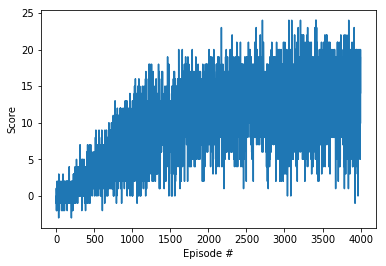

In [9]:
# plot the scores
fig = plt.figure()
plt.plot(np.arange(len(score)), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
### 4.3 Evaluate the training result

Initialize the agent using the weight file that saved previously.
Show a few episode of the replay to test the training result.
From the replay, the agent can collect the yellow bananas and avoid hitting
the blue bananas.

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_navigation.pth')
scores = navigate_train(agent, n_episode=3, train=False)


weight load success from file


In [7]:
env.close()

In [8]:
scores

[10.0, 14.0, 21.0]

In [10]:
np.mean(scores)

15.0